# Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the datasets
rating_df = pd.read_csv(r"../data/rating.csv")
domains_location_df = pd.read_csv("../data/domains_location.csv")
traffic_data_df = pd.read_csv("../data/traffic.csv")

In [11]:
rating_df.sample(5)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
55142,694777,the-times-of-india,The Times of India,TNN,BFC take on NorthEast in Guwahati,Bengaluru: Back from another round of internat...,https://timesofindia.indiatimes.com/city/benga...,"https://static.toiimg.com/thumb/msid-47529300,...",2023-11-26 02:45:52,9 quotes from the Godfather Trilogy that inspi...,Love,Bengaluru: Back from another round of internat...,Neutral
40314,399394,NaN,Globalsecurity.org,John Pike,Russia is still capable of doing evil; we must...,No description,https://www.globalsecurity.org/wmd/library/new...,NaN,2023-11-16 08:06:46,President of Ukraine\n15 November 2023 - 22:19...,Politics,President of Ukraine 15 November 2023 - 22:19 ...,Neutral
1718,90857,NaN,The Indian Express,"Rimsha Shahid, Purkho Essir Bheel",caste in pakistan: a lived reality,The legacy of caste-based exclusion in Pakista...,https://indianexpress.com/article/opinion/colu...,https://images.indianexpress.com/2023/10/Caste...,2023-10-29 02:25:03.000000,Caste or varna is certainly not the creation o...,Pakistan,caste or varna is certainly not the creation o...,Neutral
21063,167844,NaN,Forbes,"Deepali Khanna, Contributor, \n Deepali Khanna...",Turning Crisis Into Hope: Transformative Colla...,"These crises, which have hit the Global South ...",https://www.forbes.com/sites/deepalikhanna/202...,https://imageio.forbes.com/specials-images/ima...,2023-11-07 04:38:04,"Over the past few years, the world has faced a...",Weather,"Over the past few years, the world has faced a...",Positive
25336,227918,NaN,ETF Daily News,MarketBeat News,"Ropes Wealth Advisors LLC Has $411,000 Stock H...",Ropes Wealth Advisors LLC lowered its holdings...,https://www.etfdailynews.com/2023/11/08/ropes-...,https://www.americanbankingnews.com/wp-content...,2023-11-08 13:54:49,Ropes Wealth Advisors LLC lowered its holdings...,Stock,Ropes Wealth Advisors LLC lowered its holdings...,Neutral


# Functions

In [50]:
import re

def extract_website(url):
    # Regular expression pattern to match the domain name
    pattern = r"https?://(www\.)?([^/]+)"
    match = re.match(pattern, url)
    if match:
        return match.group(2)

# Test the function
url = "https://timesofindia.indiatimes.com/city/benga"
website = extract_website(url)
print(website)  # Output will be "timesofindia.indiatimes.com"


timesofindia.indiatimes.com


In [51]:
website = extract_website("https://www.globalsecurity.org/wmd/library/new...")
print(website)

globalsecurity.org


# Analysis

##  Top and Bottom 10 Websites with the Largest Count of News Articles
- 

In [59]:
rating_df['Domain'] = rating_df['url'].apply(extract_website)

In [60]:

article_counts = rating_df['Domain'].value_counts()
top_10_websites = article_counts.head(10)
bottom_10_websites = article_counts.tail(10)

In [61]:
top_10_websites

etfdailynews.com                16746
globenewswire.com                5423
economictimes.indiatimes.com     5310
globalsecurity.org               3119
forbes.com                       2784
timesofindia.indiatimes.com      2194
abcnews.go.com                   2058
businessinsider.com              2034
bbc.co.uk                        2032
punchng.com                      1800
Name: Domain, dtype: int64

In [37]:
bottom_10_websites

https://gizmodo.com                         388
https://readwrite.com                       324
https://www.euronews.com                    286
https://www.wired.com                       270
https://www.cnn.com                         267
https://www.theverge.com                    214
https://www.bbc.com                          81
https://allafrica.com                        20
https://cnalifestyle.channelnewsasia.com     18
https://cnaluxury.channelnewsasia.com         4
Name: website, dtype: int64

##  Websites with the Highest Numbers of Visitors Traffic
- worthy of note
The website \
ranking is calculated based on a mix of  estimations of a site's monthly unique visitors and monthly pageviews across desktop and mobile web traffic

In [39]:
traffic_data_df.sample(5)

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
47110,47111,23632,301gm.com,com,1597,2005,301gm.com,com,46845,23507,1597,1999
275401,275402,135364,1xbet-download-pt.com,com,674,743,1xbet-download-pt.com,com,275696,135454,674,743
3497,3498,1854,abc7chicago.com,com,8470,16918,abc7chicago.com,com,3495,1854,8417,16818
25275,25276,12814,andrealangforddesigns.com,com,2372,3010,andrealangforddesigns.com,com,24894,12616,2381,3020
144254,144255,62808,jinlianzhuanxiang.com,com,948,6689,jinlianzhuanxiang.com,com,151352,66895,943,6545


In [57]:
traffic_data_df.sort_values(by='GlobalRank', inplace=True)

In [58]:

# Step 2: Websites with the Highest Numbers of Visitors Traffic
top_traffic_websites = traffic_data_df[['Domain', 'GlobalRank']].head(10)
top_traffic_websites

,Domain,GlobalRank
0,google.com,1
1,facebook.com,2
2,youtube.com,3
3,twitter.com,4
4,instagram.com,5
5,linkedin.com,6
6,apple.com,7
7,microsoft.com,8
8,googletagmanager.com,9
9,wikipedia.org,10


- it could lso be wise to join rating data and rraffic data based on the domain information

,Domain
0,forbes.com
1,channelnewsasia.com
2,time.com
3,phys.org
4,digitaltrends.com
5,aljazeera.com
6,bbc.co.uk
7,deadline.com
8,euronews.com
9,rt.com


## Articles site with the highest ranking
- top 10 by visitors traffick

In [75]:
articles_domain =pd.DataFrame(rating_df['Domain'].unique(),columns =['Domain'])

In [76]:
data_ranked_df = pd.merge(articles_domain, traffic_data_df, on ='Domain', how = 'left')

In [77]:
data_ranked_df.sort_values(by='GlobalRank', inplace=True)

In [130]:
top_traffic_domains = data_ranked_df[['Domain', 'GlobalRank']].head(10)

In [131]:
top_traffic_domains

,Domain,GlobalRank
0,forbes.com,64.0
21,cnn.com,78.0
6,bbc.co.uk,87.0
30,bbc.com,92.0
22,businessinsider.com,115.0
2,time.com,137.0
26,npr.org,147.0
24,wired.com,148.0
25,theverge.com,202.0
23,gizmodo.com,403.0


## Countries with the Highest Number of News Media Organizations


In [86]:
updated_article_df = pd.merge(rating_df, domains_location_df, how ='left', left_on = 'Domain', right_on ='SourceCommonName')

In [87]:
country_counts = updated_article_df['Country'].value_counts()
country_counts

United States     40849
United Kingdom     2113
Nigeria            1820
India              1176
Russia             1128
Name: Country, dtype: int64

## Countries with Many Articles Written About Them

In [93]:
rating_df.sample(3)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,website,Domain
55387,700798,NaN,International Business Times,Binitha Jacob,At Least 24 Killed In Lightning Strikes In Ind...,The unseasonal rainfall was paired with thunde...,https://www.ibtimes.com/least-24-killed-lightn...,https://d.ibtimes.com/en/full/4466560/drone-vi...,2023-11-27 12:30:21,KEY POINTS\r\n<ul><li>23 people were injured a...,Weather,At least 24 people have died by lightning stri...,Negative,ibtimes.com,ibtimes.com
17833,138414,NaN,Globalsecurity.org,John Pike,Blinken Seeks Humanitarian Pause; Netanyahu Sa...,U.S. Secretary of State Antony Blinken said Fr...,https://www.globalsecurity.org/military/librar...,NaN,2023-11-04 09:18:16,"By VOA News November 03, 2023\nLatest developm...",Health,"By VOA News November 03, 2023 Latest developme...",Neutral,globalsecurity.org,globalsecurity.org
3692,103692,NaN,ETF Daily News,MarketBeat News,shell plc (nyse:shel) shares sold by capital w...,Capital Wealth Planning LLC reduced its positi...,https://www.etfdailynews.com/2023/11/02/shell-...,https://www.americanbankingnews.com/wp-content...,2023-11-02 13:10:41.000000,Capital Wealth Planning LLC reduced its positi...,Africa,capital wealth planning llc reduced its positi...,Neutral,etfdailynews.com,etfdailynews.com


In [100]:
country = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad",
    "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia",
    "Cuba", "Cyprus", "Czech", "Democratic Republic of the Congo", "Denmark", "Djibouti",
    "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany",
    "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
    "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives",
    "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco",
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal",
    "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Palestine State", "Panama", "Papua New Guinea", "Paraguay", "Peru",
    "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia",
    "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands",
    "Somalia", "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden",
    "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga",
    "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom","UK", "United States of America","USA", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City",
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]
# countries = pd.DataFrame({'Countries':country}, columns = ['Countries'])
# countries

,Countries
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
194,Venezuela
195,Vietnam
196,Yemen
197,Zambia


In [101]:
# in case of rerun note this code will take long so it has been commented out and replaced with the data


# # Initialize a dictionary to store counts of articles mentioning each country
# country_article_counts = {}

# # Loop through the list of countries
# for cntry in country:
#     # Check if the 'article' column mentions the country and count the occurrences
#     country_article_counts[cntry] = rating_df[rating_df['article'].str.contains(cntry, case=False)].shape[0]

# # Display the counts of articles mentioning each country
# pd.Series(country_article_counts)
# # for country, count in country_article_counts.items():
# #     print(f"{country}: {count} articles")


## Replaced
country_mentions = pd.read_csv('..\data\countries_mentions.csv')

Afghanistan    719
Albania        158
Algeria        154
Andorra         16
Angola         107
              ... 
Venezuela      317
Vietnam        504
Yemen          355
Zambia         177
Zimbabwe       181
Length: 199, dtype: int64

In [102]:
# country_mentions = pd.Series(country_article_counts)


In [104]:

# Filter out countries with zero mentions
country_mentions_filtered = country_mentions[country_mentions != 0]

# Sort the Series by number of mentions
country_mentions_sorted = country_mentions_filtered.sort_values(ascending=False)

# Display the sorted Series
# print(country_mentions_sorted)
country_mentions_sorted

India                               10029
UK                                   9769
Canada                               8140
USA                                  7990
China                                6092
                                    ...  
Saint Lucia                             7
Cote d'Ivoire                           4
Saint Vincent and the Grenadines        3
Palestine State                         3
Saint Kitts and Nevis                   2
Length: 199, dtype: int64

In [139]:
cdf = country_mentions.to_frame().reset_index()
cdf.columns = ['Countries','Mentions']

In [140]:
cdf.to_csv('..\data\countries_mentions.csv')

In [109]:
rating_df[rating_df.description.isna()]

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,website,Domain
1288,89024,business-insider,Business Insider,Erin Snodgrass,photos show the recently discovered wreck of a...,NaN,https://www.businessinsider.com/wwii-british-s...,https://i.insider.com/6532fb3c96f7540cd0625622...,2023-10-20 23:02:44.000000,Researchers discovered the remains of the HMS ...,Norway,a crew of norwegian maritime researchers said ...,Neutral,businessinsider.com,businessinsider.com
8415,22631,business-insider,Business Insider,Pete Syme,the auto workers union scored another major vi...,NaN,https://www.businessinsider.com/uaw-agrees-dea...,https://i.insider.com/653f882e356802a56be722e1...,2023-10-30 11:18:56.000000,UAW President Shawn Fain marches with UAW memb...,Jobs,three days after reaching a tentative agreemen...,Positive,businessinsider.com,businessinsider.com
19230,155662,the-times-of-india,The Times of India,AP,Stage set for conflict at COP28 with mixed res...,NaN,https://economictimes.indiatimes.com/news/envi...,"https://img.etimg.com/thumb/msid-104987446,wid...",2023-11-05 11:19:40,BENGALURU: Tense negotiations at the final mee...,Finance,Reuters BENGALURU: Tense negotiations at the f...,Neutral,economictimes.indiatimes.com,economictimes.indiatimes.com
20403,159108,the-times-of-india,The Times of India,ANI,Art exhibition celebrates symbiotic relationsh...,NaN,https://economictimes.indiatimes.com/news/envi...,"https://img.etimg.com/thumb/msid-104984512,wid...",2023-11-05 08:34:51,NEW DELHI: President Droupadi Murmu inaugurate...,Climate,"President Murmu inaugrated an art exhibition, ...",Positive,economictimes.indiatimes.com,economictimes.indiatimes.com
24424,212383,the-times-of-india,The Times of India,IANS,Philanthropist organisations in India raising ...,NaN,https://economictimes.indiatimes.com/news/envi...,"https://img.etimg.com/thumb/msid-105065477,wid...",2023-11-08 09:44:24,NEW DELHI: Philanthropy initiatives have alway...,Climate,IANS NEW DELHI: Philanthropy initiatives have ...,Positive,economictimes.indiatimes.com,economictimes.indiatimes.com
26361,212383,the-times-of-india,The Times of India,IANS,Philanthropist organisations in India raising ...,NaN,https://economictimes.indiatimes.com/news/envi...,"https://img.etimg.com/thumb/msid-105065477,wid...",2023-11-08 09:44:24,NEW DELHI: Philanthropy initiatives have alway...,Climate,IANS NEW DELHI: Philanthropy initiatives have ...,Positive,economictimes.indiatimes.com,economictimes.indiatimes.com
28099,237859,NaN,The Indian Express,Trends Desk,"A week after installation, bus stop ‘valued at...",NaN,https://indianexpress.com/article/trending/tre...,https://images.indianexpress.com/2023/11/Polic...,2023-11-10 11:40:16,A newly installed bus stop “worth Rs 10 lakh” ...,Instagram,A newly installed bus stop “worth Rs 10 lakh” ...,Neutral,indianexpress.com,indianexpress.com
36301,341055,the-times-of-india,The Times of India,PTI,Global emissions may drop by just 2 per cent b...,NaN,https://economictimes.indiatimes.com/news/envi...,"https://img.etimg.com/thumb/msid-105214543,wid...",2023-11-14 15:00:26,NEW DELHI: Global emissions are predicted to d...,Climate,NEW DELHI: Global emissions are predicted to...,Neutral,economictimes.indiatimes.com,economictimes.indiatimes.com
39531,393073,NaN,NPR,Treye Green,What questions do you have about traveling wit...,NaN,https://www.npr.org/2023/11/16/1213472331/what...,https://media.npr.org/assets/img/2023/11/16/ge...,2023-11-16 15:22:55,A mother with her baby in the transit zone of ...,Travel,A mother with her baby in the transit zone of ...,Neutral,npr.org,npr.org
54815,691604,the-times-of-india,The Times of India,PTI,Coal-based power plants aggravating air pollut...,NaN,https://economictimes.indiatimes.com/news/envi...,"https://img.etimg.com/thumb/msid-105507345,wid...",2023-11-26 04:13:03,NEW DELHI: Non-compliance of thermal power pla...,Health,NEW DELHI: Non-compliance of thermal

## Websites Reporting About Specific Countries/Regions

In [110]:
# Drop rows with NaN values in the 'description' column
rating_df_filtered = rating_df.dropna(subset=['description'])

# Step 5: Websites Reporting About Specific Countries/Regions
country_specific_websites = rating_df_filtered[rating_df_filtered['description'].str.contains('|'.join(['Africa', 'US', 'China', 'EU', 'Russia', 'Ukraine', 'Middle East']), case=False)]['Domain'].value_counts()

# Display the result
print(country_specific_websites)


etfdailynews.com                    5040
globenewswire.com                   2571
economictimes.indiatimes.com        2246
globalsecurity.org                  1391
timesofindia.indiatimes.com         1144
forbes.com                           980
businessinsider.com                  952
punchng.com                          866
abcnews.go.com                       852
rt.com                               756
bbc.co.uk                            631
ibtimes.com                          626
marketscreener.com                   626
phys.org                             623
aljazeera.com                        600
deadline.com                         555
boingboing.net                       419
npr.org                              406
indianexpress.com                    392
channelnewsasia.com                  355
digitaltrends.com                    230
time.com                             208
gizmodo.com                          202
readwrite.com                        183
androidcentral.c

## Websites with the Highest Count of Positive, Neutral, and Negative Sentiment

In [118]:
# Step 6: Websites with the Count of Positive, Neutral, and Negative Sentiment using pivot_table()
sentiment_counts = rating_df.pivot_table(index='Domain', columns='title_sentiment', aggfunc='size', fill_value=0)



### Highest Negative Count

In [119]:
sentiment_counts['Negative'].idxmax()

'businessinsider.com'

### Highest Neutral Count

In [120]:
sentiment_counts['Neutral'].idxmax()

'etfdailynews.com'

### Highest Positive Count

In [121]:
sentiment_counts['Positive'].idxmax()

'etfdailynews.com'

## Websites with the Highest Proportion of Positive, Neutral, and Negative Sentiment

it is sometimes useful to check the proportion of each occurence rather than just the count

In [123]:
# Step 6: Websites with the Proportion of Positive, Neutral, and Negative Sentiment using pivot_table()
sentiment_proportions = rating_df.pivot_table(index='Domain', columns='title_sentiment', aggfunc='size', fill_value=0)

# Calculate the total count of articles for each domain
total_counts = sentiment_proportions.sum(axis=1)

# Divide each count by the total count for each domain to get proportions
sentiment_proportions = sentiment_proportions.div(total_counts, axis=0)




### Highest Negative Proportion

In [126]:
sentiment_proportions.loc[sentiment_proportions['Negative'].idxmax(),:]

title_sentiment
Negative    0.437561
Neutral     0.445919
Positive    0.116519
Name: businessinsider.com, dtype: float64

### Highest Neutral Proportion

In [127]:
sentiment_proportions.loc[sentiment_proportions['Neutral'].idxmax(),:]

title_sentiment
Negative    0.033441
Neutral     0.907321
Positive    0.059238
Name: etfdailynews.com, dtype: float64

### Highest Negative Proportion

In [128]:
sentiment_proportions.loc[sentiment_proportions['Positive'].idxmax(),:]

title_sentiment
Negative    0.072797
Neutral     0.406130
Positive    0.521073
Name: androidcentral.com, dtype: float64

## Comparison of  Sentiment

In [129]:
# SComparison of Mean/Average and Median Sentiment
sentiment_comparison = sentiment_counts.describe()
sentiment_comparison

title_sentiment,Negative,Neutral,Positive
count,33.000000,33.000000,33.000000
mean,276.757576,1300.787879,190.818182
std,280.594907,2687.281314,273.581164
min,0.000000,2.000000,0.000000
25%,42.000000,212.000000,33.000000
50%,185.000000,698.000000,78.000000
75%,455.000000,1167.000000,170.000000
max,890.000000,15194.000000,992.000000


## Distribution of Sentiments for Top 10 Domains by Visitors Traffic


In [165]:
sent_dist = pd.merge(top_traffic_domains,sentiment_counts.reset_index(), on = 'Domain')

In [166]:
sent_dist

,Domain,GlobalRank,Negative,Neutral,Positive
0,forbes.com,64.0,216,1933,635
1,cnn.com,78.0,102,142,23
2,bbc.co.uk,87.0,828,1135,69
3,bbc.com,92.0,26,50,5
4,businessinsider.com,115.0,890,907,237
5,time.com,137.0,185,382,33
6,npr.org,147.0,279,617,85
7,wired.com,148.0,65,138,67
8,theverge.com,202.0,35,118,61
9,gizmodo.com,403.0,76,253,59


In [141]:
rating_df

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,website,Domain
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral,forbes.com,forbes.com
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive,channelnewsasia.com,channelnewsasia.com
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative,time.com,time.com
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral,phys.org,phys.org
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral,digitaltrends.com,digitaltrends.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral,indianexpress.com,indianexpress.com
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral,forbes.com,forbes.com
58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative,npr.org,npr.org
58354,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,Neutral,forbes.com,forbes.com


## making and comparing meta data

In [178]:
# Step 7: Compare Content Metadata Across Sites

# Clean 'article' and 'title' columns
rating_df['clean_article'] = rating_df['article'].str.replace(r'\s+', ' ', regex=True)
rating_df['clean_title'] = rating_df['title'].str.replace(r'\s+', ' ', regex=True)

# Count number of words in 'clean_article' and 'clean_title'
rating_df['article_word_count'] = rating_df['clean_article'].str.split().apply(len)
rating_df['title_word_count'] = rating_df['clean_title'].str.split().apply(len)






In [149]:
# Split 'author' strings by newline characters and count the number of authors
rating_df['author_count'] = rating_df['author'].fillna('Not Given').str.split('\n').apply(len)

# Group by 'Domain' and calculate the mean and standard deviation for each metadata across sites
metadata_comparison = rating_df.groupby('Domain').agg({
    'article_word_count': ['mean', 'std'],
    'title_word_count': ['mean', 'std'],
    'author_count': ['mean', 'std']
})

# Add count of each domain
metadata_comparison['domain_count'] = rating_df.groupby('Domain').size()



In [150]:
metadata_comparison

article_word_count               \
                                               mean          std   
Domain                                                             
abcnews.go.com                           653.055879   419.160268   
aljazeera.com                            675.822716   450.246984   
allafrica.com                            577.800000   294.817446   
androidcentral.com                       719.385057   712.210632   
bbc.co.uk                                604.655020   339.061760   
bbc.com                                  647.987654   348.688740   
boingboing.net                           288.475456   150.707777   
businessinsider.com                      600.211406   405.921631   
channelnewsasia.com                      345.194785   158.745322   
cnalifestyle.channelnewsasia.com         204.444444   152.779434   
cnaluxury.channelnewsasia.com            200.000000    75.210815   
cnn.com                                  856.479401   523.432097   
deadline.com                             585.005365   624.886680   
digitaltrends.com                        667.118622   495.697081   
economictimes.indiatimes.com             901.880603   373.726137   
etfdailynews.com                         675.533919   257.735791   
euronews.com                             556.531469   370.492234   
forbes.com                               886.849138   520.621074   
gizmodo.com                              597.110825   545.261325   
globalsecurity.org                       678.361975   903.992591   
globenewswire.com                        785.658676   731.296514   
ibtimes.com                              599.437448   367.446650   
indianexpress.com                        573.892007   432.644393   
marketscreener.com                       956.025698  1462.284702   
npr.org                                  744.667686   685.873581   
phys.org                                4401.518606  6387.792748   
punchng.com                             5473.265000  9513.443792   
readwrite.com                            599.780864   902.428827   
rt.com                                   413.546099   284.377914   
theverge.com                             679.789720   957.794418   
time.com                                 953.633333   534.921234   
timesofindia.indiatimes.com              412.463993   222.192020   
wired.com                                750.740741  1206.421009   

                                 title_word_count           author_count       \
                                             mean       std         mean  std   
Domain                                                                          
abcnews.go.com                          13.480078  2.624784          1.0  0.0   
aljazeera.com                           10.158654  1.866906          1.0  0.0   
allafrica.com                            9.950000  2.089447          1.0  0.0   
androidcentral.com                      12.243295  2.884901          1.0  0.0   
bbc.co.uk                                9.362205  1.776455          1.0  0.0   
bbc.com                                  8.839506  1.720878          1.0  0.0   
boingboing.net                          12.150070  4.025017          1.0  0.0   
businessinsider.com                     18.022616  5.182501          1.0  0.0   
channelnewsasia.com                     10.832822  2.534789          1.0  0.0   
cnalifestyle.channelnewsasia.com        15.333333  3.725903          1.0  0.0   
cnaluxury.channelnewsasia.com           11.000000  2.309401          1.0  0.0   
cnn.com                                 13.235955  3.666622          1.0  0.0   
deadline.com                            15.516094  4.975640          1.0  0.0   
digitaltrends.com                       10.858418  2.144012          1.0  0.0   
economictimes.indiatimes.com            12.372505  3.431629          1.0  0.0   
etfdailynews.com                        10.767945  2.438154          1.0  0.0   
euronews.com                            11.67

In [151]:
# Flatten the multi-level columns
metadata_comparison.columns = ['_'.join(col).strip() for col in metadata_comparison.columns.values]


In [157]:
# rating_df[rating_df['article_word_count']>100]['article_word_count'].hist(bins = 10)

101

In [152]:
metadata_comparison.columns

Index(['article_word_count_mean', 'article_word_count_std',
       'title_word_count_mean', 'title_word_count_std', 'author_count_mean',
       'author_count_std', 'domain_count_'],
      dtype='object')

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:


sent_dist = pd.merge(traffic_data_df[['Domain', 'GlobalRank']],sentiment_counts.reset_index(), on = 'Domain')
# Calculate the total number of reports by a website
sent_dist['Total_reports'] = sent_dist['Negative'] + sent_dist['Neutral'] + sent_dist['Positive']


In [175]:
sent_dist['Average_sentiment'] = (sent_dist['Positive'] - sent_dist['Negative'])/ sent_dist['Total_reports']

###  Scatter plot
Removed the The outlier of over 10k only one in that category

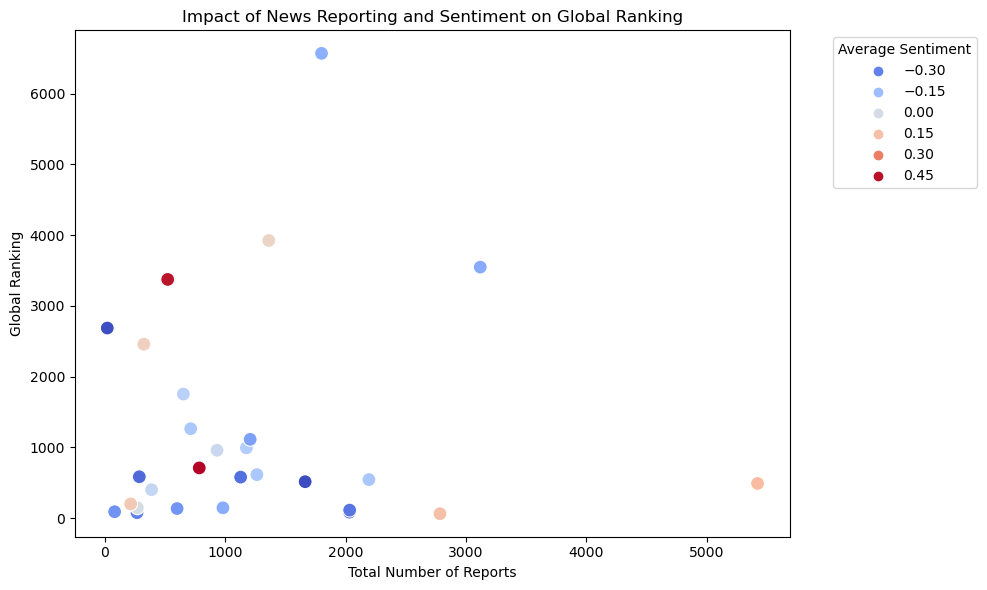

In [179]:

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sent_dist[sent_dist['Total_reports']<10000], x='Total_reports', y='GlobalRank', hue='Average_sentiment', palette='coolwarm', s=100)

# Add title and labels
plt.title('Impact of News Reporting and Sentiment on Global Ranking')
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking')

# Show the plot
plt.legend(title='Average Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [177]:

## this is  similar to finding the map value after mapping positive to 1 and negative -1 neutral 0
## 

In [164]:
sent_dist

,Domain,GlobalRank,Negative,Neutral,Positive,Average_sentiment
0,forbes.com,64.0,0.077586,0.694325,0.228089,0.150503
1,cnn.com,78.0,0.382022,0.531835,0.086142,-0.295880
2,bbc.co.uk,87.0,0.407480,0.558563,0.033957,-0.373524
3,bbc.com,92.0,0.320988,0.617284,0.061728,-0.259259
4,businessinsider.com,115.0,0.437561,0.445919,0.116519,-0.321042
5,time.com,137.0,0.308333,0.636667,0.055000,-0.253333
6,npr.org,147.0,0.284404,0.628950,0.086646,-0.197757
7,wired.com,148.0,0.240741,0.511111,0.248148,0.007407
8,theverge.com,202.0,0.163551,0.551402,0.285047,0.121495
9,gizmodo.com,403.0,0.195876,0.652062,0.152062,-0.043814


In [184]:
rating_df

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,website,Domain,clean_article,clean_title,article_word_count,title_word_count,author_count
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral,forbes.com,forbes.com,"pavyllon london, at four seasons hotel london ...",superstar chef yannick alléno brings refined f...,945,11,3
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive,channelnewsasia.com,channelnewsasia.com,nice moved into provisional first place in the...,nice claim top spot in ligue 1 with late win a...,132,12,1
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative,time.com,time.com,"the world’s frogs, salamanders, newts and othe...",amphibians are the world’s most vulnerable spe...,421,11,1
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral,phys.org,phys.org,iron-rich sediment colors the red-orange water...,image: rusty red waters in madagascar,310,6,1
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral,digitaltrends.com,digitaltrends.com,"everything ends. no, i’m not having an existen...",everything leaving max (formerly hbo max) in n...,636,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral,indianexpress.com,indianexpress.com,Karnataka Deputy Chief Minister D K Shivakumar...,"Have done no wrong, only did party work, says ...",463,16,1
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral,forbes.com,forbes.com,FC Barcelona have guaranteed at least $767.6 m...,FC Barcelona Guarantees $77.6 Million Champion...,387,12,3
58353,781235,NaN,NPR,Brigid McCa

In [183]:
# rating_df.to_csv('..\data\article.csv')